## Student Performance Indicator

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB



In [2]:
data = pd.read_csv("SouthGermanCredit.asc",delimiter=' ')

In [4]:
data

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


### Column names are in German, Lets convert it into English

In [5]:
columns_english = {
    'laufkont': 'status',
    'laufzeit': 'duration',
    'moral': 'credit_history',
    'verw': 'purpose',
    'hoehe':'amount',
    'sparkont':'savings',
    'beszeit':'employment_duration',
    'rate':'installment_rate',
    'famges':'personal_status_sex',
    'buerge':'other_debtors',
    'wohnzeit':'present_residence',
    'verm':'property',
    'alter':'age',
    'weitkred':'other_installment_plans',
    'wohn':'housing',
    'bishkred':'number_credits',
    'beruf':'job',
    'pers':'people_liable',
    'telef':'telephone',
    'gastarb':'foreign_worker',
    'kredit':'credit_risk'}

In [6]:
data = data.rename(columns=columns_english)

In [7]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [9]:
data.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

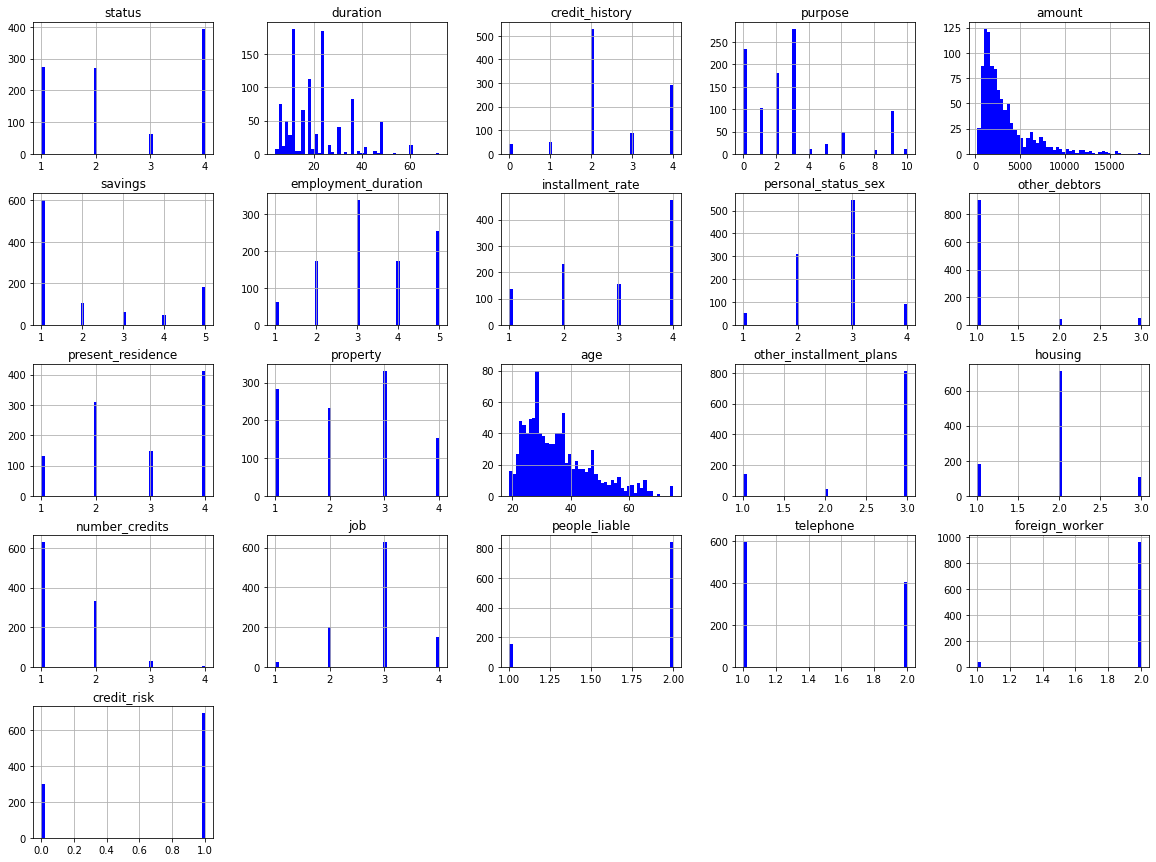

In [12]:

data.hist(bins=50,figsize=(20,15),color='blue')
plt.show()

In [10]:
data_scaled = data.copy()

### Lets normalize the duration, age and salary column since they are significantly differ from the other columns, and this may affect the performance of model,

In [13]:
scaler = MinMaxScaler()
columns_to_normalize = ['duration', 'amount', 'age']

In [14]:
data_scaled[columns_to_normalize] = scaler.fit_transform(data_scaled[columns_to_normalize])

In [17]:
data_scaled.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,0.205882,4,2,0.043964,1,2,4,2,1,...,2,0.035714,3,1,1,3,2,1,2,1
1,1,0.073529,4,0,0.140255,1,3,2,3,1,...,1,0.303571,3,1,2,3,1,1,2,1
2,2,0.117647,2,9,0.032519,2,4,2,2,1,...,1,0.071429,3,1,1,2,2,1,2,1
3,1,0.117647,4,0,0.103004,1,3,3,3,1,...,1,0.357143,3,1,2,2,1,1,1,1
4,1,0.117647,4,0,0.105700,1,3,4,3,1,...,2,0.339286,1,2,2,2,2,1,1,1


<Axes: >

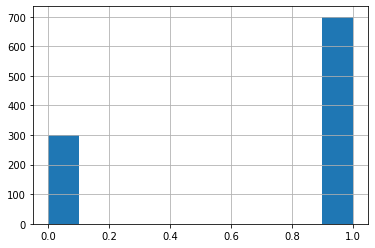

In [53]:
data['credit_risk'].hist()

In [18]:

X_scaled = data_scaled.drop(['credit_risk'],axis=1)
y_scaled = data_scaled['credit_risk']

In [19]:
X = data.drop(['credit_risk'],axis=1)
y = data['credit_risk']

In [20]:
X.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1


In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: credit_risk, dtype: int64

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 20)
(200, 20)
(800,)
(200,)


In [24]:
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=42)

In [25]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train_scaled.shape)
print(y_test_scaled.shape)

(800, 20)
(200, 20)
(800,)
(200,)


## Implementing ML Algorithms

### Logistic Regression

In [41]:
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train_scaled,y_train)

y_pred = logistic_regression.predict(X_test_scaled)

In [44]:
accuracy = logistic_regression.score(X_test_scaled,y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.44      0.52        62
           1       0.78      0.89      0.83       138

    accuracy                           0.75       200
   macro avg       0.71      0.66      0.68       200
weighted avg       0.74      0.75      0.73       200



### Naive Bayes

In [30]:

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)
accuracy = naive_bayes.score(X_test,y_test)
print("Accuracy: ",accuracy)
print(classification_report(y_test, y_pred))

Accuracy:  0.765
              precision    recall  f1-score   support

           0       0.62      0.63      0.62        62
           1       0.83      0.83      0.83       138

    accuracy                           0.77       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.77      0.77      0.77       200



### Decision Tree Classifier

In [ ]:


##### Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

##### Initialize a Decision Tree classifier
dt = DecisionTreeClassifier()

##### Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

##### Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

##### Get the best parameters from the grid search
best_params = grid_search.best_params_

In [47]:
print("Best parameters found: ", best_params)

Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}


In [48]:
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=None,max_features='log2',min_samples_leaf=4,min_samples_split=5,splitter='random')
decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.45      0.47        62
           1       0.76      0.80      0.78       138

    accuracy                           0.69       200
   macro avg       0.63      0.62      0.63       200
weighted avg       0.68      0.69      0.69       200





##### Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

##### Initialize a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

##### Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

##### Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

##### Get the best parameters from the grid search
best_params = grid_search.best_params_

In [50]:
print("Best parameters found: ", best_params)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [51]:
random_forest = RandomForestClassifier(criterion='entropy',max_depth=20,max_features='auto',min_samples_leaf=1,min_samples_split=5,n_estimators=200)

random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.44      0.52        62
           1       0.78      0.90      0.84       138

    accuracy                           0.76       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.74      0.76      0.74       200

